The `%matplotlib` magic command is used here to enable plotting in the current notebook. The `inline` backend will embed plots inside the notebook.

In [1]:
%matplotlib inline

#### Import necessary modules

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### We can directly read the netcdf file from the THREDDS server using the xarray package: 

In [3]:
ds = xr.open_dataset('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc')

#### You can list variables in the netcdf file:

In [4]:
print ds

<xarray.Dataset>
Dimensions:                  (time: 51130)
Coordinates:
    lat                      float64 ...
    lon                      float64 ...
    station_name             |S64 ...
  * time                     (time) datetime64[ns] 2011-03-01T18:00:00 ...
Data variables:
    AirTC_2_Avg              (time) float64 ...
    AirTC_Avg                (time) float64 ...
    Albedo_1_Avg             (time) float64 ...
    Albedo_Avg               (time) float64 ...
    CmCIR_Avg                (time) float64 ...
    CmGIR_Avg                (time) float64 ...
    DnTot_Avg                (time) float64 ...
    IR01DnCo_Avg             (time) float64 ...
    IR01Dn_Avg               (time) float64 ...
    IR01UpCo_Avg             (time) float64 ...
    IR01Up_Avg               (time) float64 ...
    LPO2Dn_Avg               (time) float64 ...
    Max_Run_Tot_mm_24hr_Max  (time) float64 ...
    Max_Run_Tot_mm_2hr_Max   (time) float64 ...
    NR01TC_Avg               (time) float64 

#### Tip 1

To make our lives easier, we can create a dictionary that contains the variable names as they are in the table above as well as the actual names that humans use. We will call this dictionary: names. Once we have created this dictionary, we can look up the data variables in it and get the human name.

For example:

In [5]:
names = {'AirTC_Avg': 'Air Temperature (conventional roof)',
         'AirTC_2_Avg': 'Air Temperature (green roof)',
         'RH': 'Relative Humidity (conventional Roof)',
         'RH_2': 'Relative Humidity (green roof)',
         'CmCIR_Avg': 'Infrared Skin Temperature (conventional roof)',
         'CmGIR_Avg': 'Infrared Skin Temperature (green roof)'}
print names['CmGIR_Avg']

Infrared Skin Temperature (green roof)


#### Tip 2

To plot several variables over a defined period of time, we can use a list of variables, and a slice of time to generate a `pandas.DataFrame`. Converting to a `pandas.DataFrame` gives us lots of options for analysis, but it also means that we are going to load the data into local memory, so be careful how much data you try to load. This can get slow if you try to load all the variables for years of data being collected every minute. 

For example:

In [6]:
Temp_and_RH_ds = ds[['AirTC_Avg', 'AirTC_2_Avg', 'RH','RH_2', 'CmCIR_Avg', 'CmGIR_Avg']]
newdf = Temp_and_RH_ds.to_dataframe().drop(['lon', 'lat', 'station_name'], axis=1)
newdf.describe(percentiles=[.1, .25, .5, .75, .9])

,AirTC_Avg,AirTC_2_Avg,RH,RH_2,CmCIR_Avg,CmGIR_Avg
count,51130.000000,51130.000000,51130.000000,51130.000000,51130.000000,51130.000000
mean,13.311722,13.411818,67.158315,64.301813,13.284534,13.494918
std,10.264591,10.253216,25.142876,20.945313,14.528144,11.873294
min,-17.900000,-17.930000,10.600000,10.700000,-25.260000,-22.150000
10%,-0.293000,-0.196100,36.630000,35.220000,-4.361000,-1.879000
25%,5.245500,5.365000,48.870000,47.632500,2.433000,4.420250
50%,13.830000,13.950000,65.590000,64.340000,12.460000,13.680000
75%,21.390000,21.490000,83.500000,82.600000,21.580000,21.570000
90%,26.570000,26.650000,94.900000,92.900000,33.630000,29.111000
max,40.770000,39.410000,160.700000,100.000000,59.620000,50.180000


#### You can plot the time series picking up 2 variables for the entire data record:

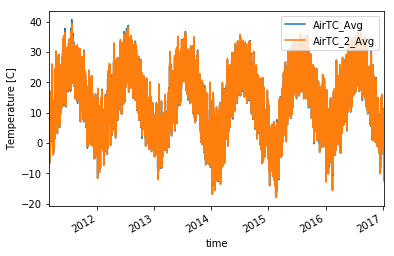

In [7]:
newdf.AirTC_Avg.plot()
newdf.AirTC_2_Avg.plot()
plt.ylabel('Temperature [C]')
plt.legend(loc='upper right');

#### If you just want to show one particular day:

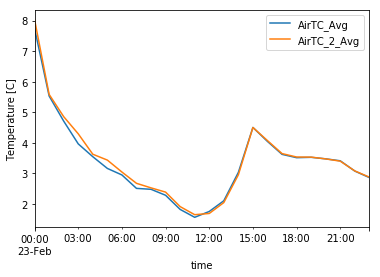

In [8]:
newdf['AirTC_Avg'].loc['2016-02-23'].plot()
newdf['AirTC_2_Avg'].loc['2016-02-23'].plot()
plt.title("")
plt.ylabel('Temperature [C]')
plt.legend(loc='upper right');

#### We often are more interested in looking at a particular time range. Here is one way to select a particular time range:

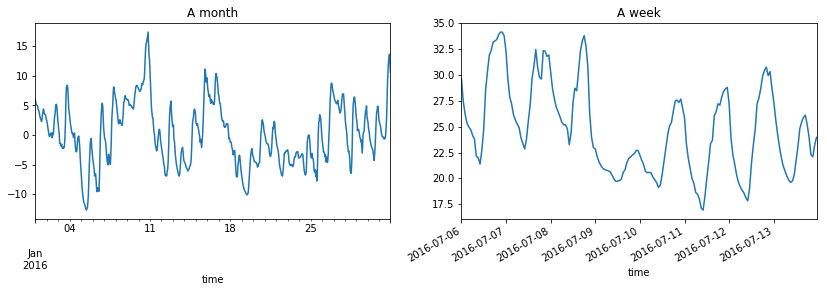

In [9]:
# Choose a date period (such as a month)
a_month = newdf['AirTC_Avg'].loc['2016-01']

# Or grab the range between two specific days
a_week =  newdf['AirTC_Avg'].loc[slice('2016-07-06', '2016-07-13')]

# Create a figure with two subplots 
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,4))

# Plot the month of data in the first subplot
a_month.plot(ax=axes[0])
axes[0].set_title('A month')

# Plot the week of data in the second subplot
a_week.plot(ax=axes[1])
axes[1].set_title('A week')

plt.show()

#### You can also plot  2 variables with different y axies

In [10]:
newdf_short = newdf[['AirTC_Avg','CmCIR_Avg']]

In [11]:
newdf_short

,AirTC_Avg,CmCIR_Avg
time,,
2011-03-01 18:00:00,6.504,11.210
2011-03-01 19:00:00,7.484,13.010
2011-03-01 20:00:00,8.480,13.070
2011-03-01 21:00:00,8.910,11.360
2011-03-01 22:00:00,8.770,7.267
2011-03-01 23:00:00,7.254,1.791
2011-03-02 00:00:00,5.824,-2.593
2011-03-02 01:00:00,4.508,-5.336
2011-03-02 02:00:00,3.056,-7.291


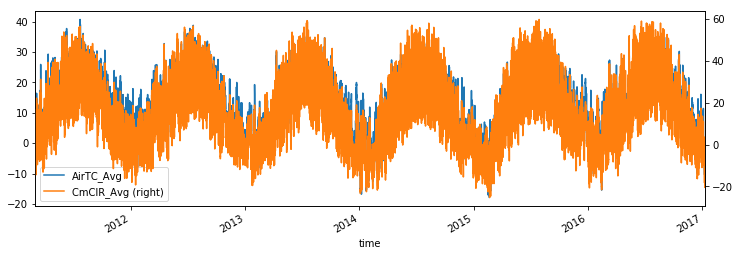

In [12]:
# Plot on left and right axes
newdf_short.plot(secondary_y='CmCIR_Avg', figsize=(12,4));

#### Show monthly boxplots for the entire time series

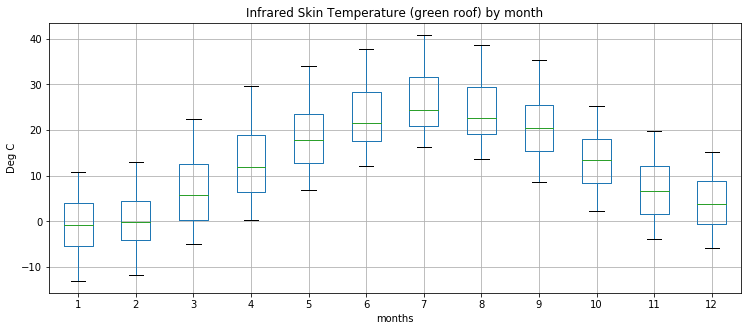

In [13]:
var = 'CmGIR_Avg'
newdf.boxplot(column=var, by=newdf.index.month, whis=[5, 95], sym='', figsize=(12,5))
plt.xlabel('months')
plt.ylabel(ds[var].units)
plt.title(names[var]+' by month')
plt.suptitle('');

#### Plot the diurnal cycle for the entire time series

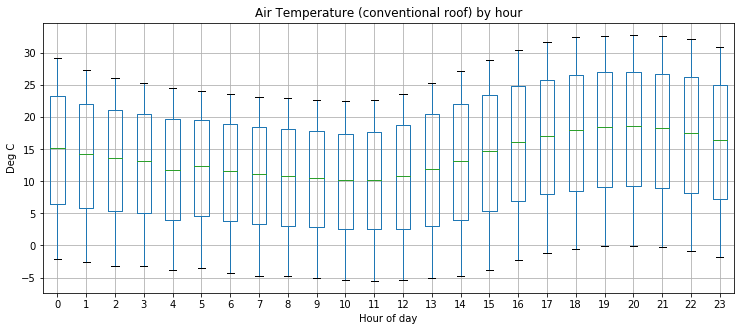

In [14]:
var = 'AirTC_Avg'
newdf.boxplot(column=var, by=newdf.index.hour, whis=[5, 95], sym='', figsize=(12,5))
plt.xlabel('Hour of day')
plt.ylabel(ds[var].units)
plt.title(names[var]+' by hour')
plt.suptitle('');

#### Plot the diurnal cycle for warm seasons

In [15]:
newdf_warm = newdf[(newdf.index.month >= 6) & (newdf.index.month <=8)]

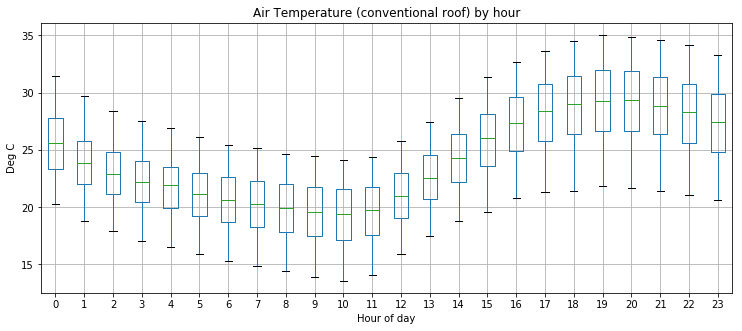

In [16]:
var = 'AirTC_Avg'
newdf_warm.boxplot(column=var, by=newdf_warm.index.hour, whis=[5, 95], sym='', figsize=(12,5))
plt.xlabel('Hour of day')
plt.ylabel(ds[var].units)
plt.title(names[var]+' by hour')
plt.suptitle('');